In [17]:
import numpy as np
import pandas as pd
from tqdm import tqdm 
from  util import train_test_split
import matplotlib.pyplot as plt

In [18]:
class LogisticRegression:
    def __init__(self, lr = 0.01, epochs = 10000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        for _ in tqdm(range(self.epochs)):
            y_pred = np.dot(X, self.weights) + self.bias
            Z = self._sigmoid(y_pred)
            
            dw = (1 / num_samples) * np.dot(X.T, (Z - y))
            db = (1 / num_samples) * np.sum(Z - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    
    def _sigmoid(self, Z):

        """"
        Sigmoid (Logistic) Function: Logistic regression uses the sigmoid function 
        to map any real-valued input into a value between 0 and 1, representing probability
        """

        return 1 / (1 + np.exp(-Z))


    def predict(self, X, threshold = 0.5):
        linear = np.dot(X, self.weights) + self.bias
        h = self._sigmoid(linear)
        return (h >= threshold).astype(int)




In [19]:
# Data

data = pd.read_csv("d://Github_Repo's/iamprasadraju/Datasets/breast_cancer.csv")

X = data[["radius_mean", "texture_mean"]].to_numpy()
y = data["diagnosis"].map({'B': 0, 'M': 1}).astype(int).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y)
    

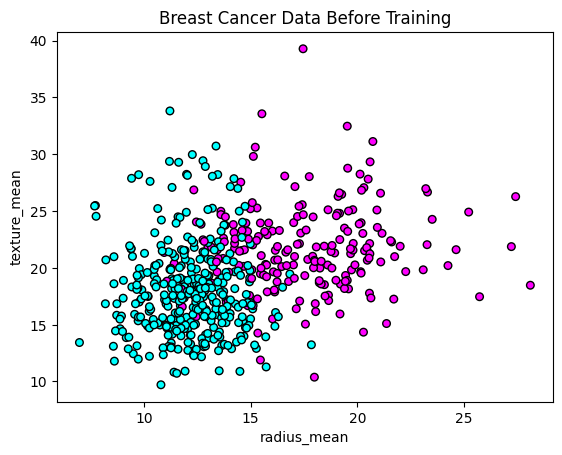

In [20]:
# Plot before Training

plt.scatter(data["radius_mean"], data["texture_mean"], c=y, cmap='cool', edgecolors='k', s=30)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title("Breast Cancer Data Before Training")
plt.show()


In [21]:
# Training

model = LogisticRegression(0.01, 10000)
model.fit(X_train, y_train)

100%|██████████| 10000/10000 [00:00<00:00, 26806.68it/s]


In [22]:
# Predictions

result = model.predict(X_test)
accuracy  = np.mean(result== y_test)
print(f"accuracy : {accuracy:.2f}")

accuracy : 0.92


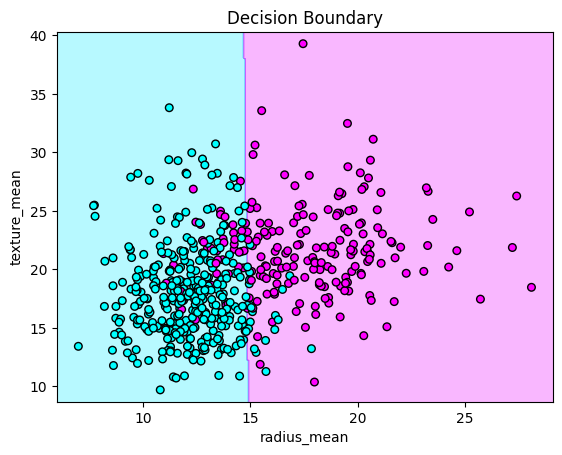

In [23]:
# After Training plot

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='cool')
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool', edgecolors='k', s=30)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title("Decision Boundary")
plt.show()
